In [1]:
#import file that reads required libraries and packages
import sys
sys.path.append("C:/Users/Danny Farone/Documents/GitHub/Data-Science-Job-Salaries/src/")
from required_libraries import *

In [2]:
#read in the X_test, X_train, y_test, and y_train files for the Data Analyst Logistic Regression
X_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Analyst\DataAnalyst_X_Test.csv")
X_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Analyst\DataAnalyst_X_Train.csv")
y_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Analyst\DataAnalyst_y_Test.csv")
y_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Analyst\DataAnalyst_y_Train.csv")

In [3]:
# fit initial model on the training data
logistic = LogisticRegression(max_iter = 1000, random_state = 42)
logistic.fit(X_train, y_train)

#accuracy of the model on the testing data
da_log_score_test = logistic.score(X_test, y_test)
#predictions for the model on the testing data
da_log_pred_test = logistic.predict(X_test)
#Precision of the model on the testing data
da_log_precision_test = precision_score(y_test, da_log_pred_test)
#Recall of the model on the testing data
da_log_recall_test = recall_score(y_test, da_log_pred_test)

#Print a simple confusion matrix of the teting data results
print("Logistic Regression Model Testing Data Confusion Matrix :")
print(confusion_matrix(y_test, da_log_pred_test)) 
#Print the scores
print("Accuracy: ", da_log_score_test)
print("Sensitivity: ", da_log_recall_test)
print("Specificity: ", da_log_precision_test)

Logistic Regression Model Testing Data Confusion Matrix :
[[94  0]
 [28  0]]
Accuracy:  0.7704918032786885
Sensitivity:  0.0
Specificity:  0.0


In [4]:
#create a dataframe of the the True values, False values, True Predictions, and False Predicitons for a confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, da_log_pred_test), index=['Other','Data_Analyst'], 
                  columns=['Other','Data_Analyst'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'

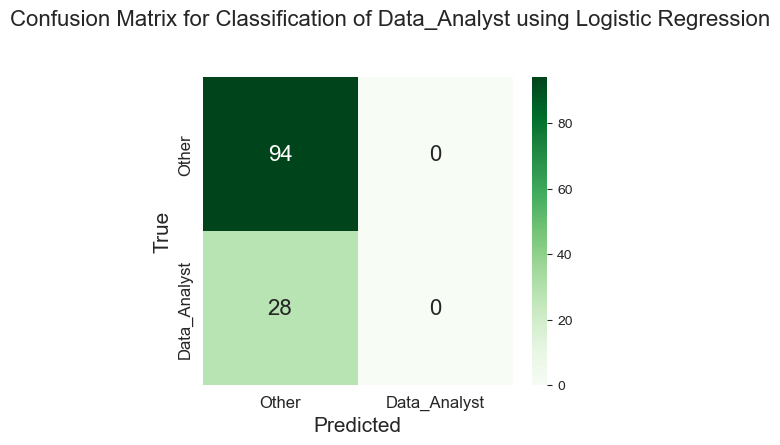

In [5]:
#use seaborn to create a heatmap of the confusion matrix from above
df_cm = pd.DataFrame(cm)

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 4))
fig.suptitle('Confusion Matrix for Classification of Data_Analyst using Logistic Regression', 
             fontsize=16, y=1.05)
ax = plt.subplot()
sns.heatmap(df_cm, annot=True, cmap="Greens", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Other','Data_Analyst'], fontsize=12) 
ax.yaxis.set_ticklabels(['Other','Data_Analyst'], fontsize=12, va='center')
plt.show()

In [6]:
# plot ROC curve
y_pred_prob = logistic.predict_proba(X_test)[:,1]
# calculate roc curve
da_fpr, da_tpr, da_thresholds  = roc_curve(y_test, logistic.predict(X_test))
# roc auc score
da_log_roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(da_log_roc_auc)

In [7]:
#set a variable for the logistic intercept
log_intercept = logistic.intercept_ 
beta_0 = log_intercept

# extract log reg coefs
coef = logistic.coef_[0]
coef = np.array(coef)
df_coef = pd.DataFrame(coef)
df_coef = df_coef.T # transpose to match column names

# column names
names = X_train.columns
df_coef.columns = names
df_coef = df_coef.T # transpose for better view

# sort coefficients in ascending order
df_coef = df_coef.rename(columns = {0:'logregCV_coeff'})
df_coef = df_coef.sort_values('logregCV_coeff')
df_coef = df_coef.reset_index()
df_coef = df_coef.rename(columns = {'index':'Variable_Names', 'logreg_coeff':'logregCV_coeff'})
df_coef

,Variable_Names,logregCV_coeff
0,work_year,-0.000609
1,Mid_Exp,-0.000080
2,EUR,-0.000069
3,Small_Company,-0.000063
4,Other_Currency,-0.000062
5,Large_Company,-0.000054
6,GBP,-0.000031
7,Entry_Exp,-0.000030
8,INR,-0.000016
9,salary_in_usd,-0.000005


In [8]:
#read in the X_test, X_train, y_test, and y_train files for the Data Engineer Logistic Regression
X_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Engineer\DataEngineer_X_Test.csv")
X_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Engineer\DataEngineer_X_Train.csv")
y_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Engineer\DataEngineer_y_Test.csv")
y_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Engineer\DataEngineer_y_Train.csv")

In [9]:
# fit initial model on the training data
logistic = LogisticRegression(max_iter = 10000, random_state = 42)
logistic.fit(X_train, y_train)

#accuracy of the model on the testing data
de_log_score_test = logistic.score(X_test, y_test)
#predictions for the model on the testing data
de_log_pred_test = logistic.predict(X_test)
#Precision of the model on the testing data
de_log_precision_test = precision_score(y_test, de_log_pred_test)
#Recall of the model on the testing data
de_log_recall_test = recall_score(y_test, de_log_pred_test)

#Print a simple confusion matrix of the teting data results
print("Logistic Regression Model Testing Data Confusion Matrix :")
print(confusion_matrix(y_test, de_log_pred_test)) 
#Print the scores
print("Accuracy: ", de_log_score_test)
print("Sensitivity: ", de_log_recall_test)
print("Specificity: ", de_log_precision_test)

Logistic Regression Model Testing Data Confusion Matrix :
[[80  0]
 [42  0]]
Accuracy:  0.6557377049180327
Sensitivity:  0.0
Specificity:  0.0


In [10]:
#create a dataframe of the the True values, False values, True Predictions, and False Predicitons for a confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, de_log_pred_test), index=['Other','Data_Engineer'], 
                  columns=['Other','Data_Engineer'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'

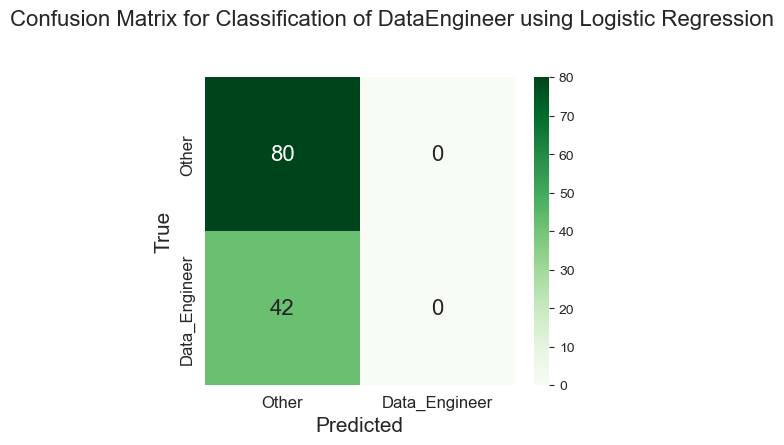

In [11]:
#use seaborn to create a heatmap of the confusion matrix from above
df_cm = pd.DataFrame(cm)

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 4))
fig.suptitle('Confusion Matrix for Classification of DataEngineer using Logistic Regression', 
             fontsize=16, y=1.05)
ax = plt.subplot()
sns.heatmap(df_cm, annot=True, cmap="Greens", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Other','Data_Engineer'], fontsize=12) 
ax.yaxis.set_ticklabels(['Other','Data_Engineer'], fontsize=12, va='center')
plt.show()

In [12]:
# plot ROC curve
y_pred_prob = logistic.predict_proba(X_test)[:,1]
# calculate roc curve
de_fpr, de_tpr, de_thresholds  = roc_curve(y_test, logistic.predict(X_test))
# roc auc score
de_log_roc_auc = roc_auc_score(y_test, y_pred_prob)

In [13]:
#set a variable for the logistic intercept
log_intercept = logistic.intercept_ 
beta_0 = log_intercept

# extract log reg coefs
coef = logistic.coef_[0]
coef = np.array(coef)
df_coef = pd.DataFrame(coef)
df_coef = df_coef.T # transpose to match column names

# column names
names = X_train.columns
df_coef.columns = names
df_coef = df_coef.T # transpose for better view

# sort coefficients in ascending order
df_coef = df_coef.rename(columns = {0:'logregCV_coeff'})
df_coef = df_coef.sort_values('logregCV_coeff')
df_coef = df_coef.reset_index()
df_coef = df_coef.rename(columns = {'index':'Variable_Names', 'logreg_coeff':'logregCV_coeff'})
df_coef

,Variable_Names,logregCV_coeff
0,work_year,-5.988797e-04
1,Entry_Exp,-5.687006e-05
2,Small_Company,-4.666469e-05
3,Large_Company,-3.216845e-05
4,EUR,-2.425611e-05
5,USD,-1.574236e-05
6,Other_Currency,-1.031756e-05
7,INR,-6.033962e-06
8,Expert_Exp,-3.225484e-06
9,salary_in_usd,3.342318e-07


In [14]:
#read in the X_test, X_train, y_test, and y_train files for the Data Scientist Logistic Regression
X_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Scientist\DataScientist_X_Test.csv")
X_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Scientist\DataScientist_X_Train.csv")
y_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Scientist\DataScientist_y_Test.csv")
y_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Data Scientist\DataScientist_y_Train.csv")

In [15]:
# fit initial model on the training data
logistic = LogisticRegression(max_iter = 1000, random_state = 42)
logistic.fit(X_train, y_train)

#accuracy of the model on the testing data
ds_log_score_test = logistic.score(X_test, y_test)
#predictions for the model on the testing data
ds_log_pred_test = logistic.predict(X_test)
#Precision of the model on the testing data
ds_log_precision_test = precision_score(y_test, ds_log_pred_test)
#Recall of the model on the testing data
ds_log_recall_test = recall_score(y_test, ds_log_pred_test)

#Print a simple confusion matrix of the teting data results
print("Logistic Regression Model Testing Data Confusion Matrix :")
print(confusion_matrix(y_test, ds_log_pred_test)) 
#Print the scores
print("Accuracy: ", ds_log_score_test)
print("Sensitivity: ", ds_log_recall_test)
print("Specificity: ", ds_log_precision_test)

Logistic Regression Model Testing Data Confusion Matrix :
[[85  5]
 [29  3]]
Accuracy:  0.7213114754098361
Sensitivity:  0.09375
Specificity:  0.375


In [16]:
#create a dataframe of the the True values, False values, True Predictions, and False Predicitons for a confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, ds_log_pred_test), index=['Other','Data_Scientist'], 
                  columns=['Other','Data_Scientist'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'

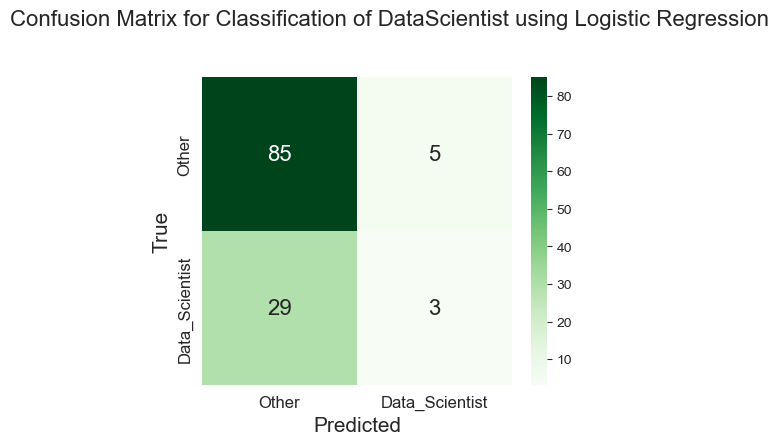

In [17]:
#use seaborn to create a heatmap of the confusion matrix from above
df_cm = pd.DataFrame(cm)

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 4))
fig.suptitle('Confusion Matrix for Classification of DataScientist using Logistic Regression', 
             fontsize=16, y=1.05)
ax = plt.subplot()
sns.heatmap(df_cm, annot=True, cmap="Greens", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Other','Data_Scientist'], fontsize=12) 
ax.yaxis.set_ticklabels(['Other','Data_Scientist'], fontsize=12, va='center')
plt.show()

In [18]:
# plot ROC curve
y_pred_prob = logistic.predict_proba(X_test)[:,1]
# calculate roc curve
ds_fpr, ds_tpr, ds_thresholds  = roc_curve(y_test, logistic.predict(X_test))
# roc auc score
ds_log_roc_auc = roc_auc_score(y_test, y_pred_prob)

In [19]:
#set a variable for the logistic intercept
log_intercept = logistic.intercept_ 
beta_0 = log_intercept

# extract log reg coefs
coef = logistic.coef_[0]
coef = np.array(coef)
df_coef = pd.DataFrame(coef)
df_coef = df_coef.T # transpose to match column names

# column names
names = X_train.columns
df_coef.columns = names
df_coef = df_coef.T # transpose for better view

# sort coefficients in ascending order
df_coef = df_coef.rename(columns = {0:'logregCV_coeff'})
df_coef = df_coef.sort_values('logregCV_coeff')
df_coef = df_coef.reset_index()
df_coef = df_coef.rename(columns = {'index':'Variable_Names', 'logreg_coeff':'logregCV_coeff'})
df_coef

,Variable_Names,logregCV_coeff
0,remote_ratio,-0.005280
1,work_year,-0.000185
2,Midsize_Company,-0.000088
3,USD,-0.000078
4,Senior_Exp,-0.000075
5,US_resident,-0.000073
6,US_location,-0.000065
7,GBP,-0.000011
8,salary_in_usd,0.000002
9,full_time_employee,0.000004


In [20]:
#read in the X_test, X_train, y_test, and y_train files for the Machine Learning Engineer Logistic Regression
X_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Machine Learning Engineer\Machine_Learning_Engineer_X_Test.csv")
X_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Machine Learning Engineer\Machine_Learning_Engineerr_X_Train.csv")
y_test = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Machine Learning Engineer\Machine_Learning_Engineer_y_Test.csv")
y_train = pd.read_csv(r"C:\Users\Danny Farone\Documents\GitHub\Data-Science-Job-Salaries\data\processed\Machine Learning Engineer\Machine_Learning_Engineer_y_Train.csv")

In [21]:
# fit initial model on the training data
logistic = LogisticRegression(max_iter = 10000, random_state = 42)
logistic.fit(X_train, y_train)

#accuracy of the model on the testing data
ml_log_score_test = logistic.score(X_test, y_test)
#predictions for the model on the testing data
ml_log_pred_test = logistic.predict(X_test)
#Precision of the model on the testing data
ml_log_precision_test = precision_score(y_test, ml_log_pred_test)
#Recall of the model on the testing data
ml_log_recall_test = recall_score(y_test, ml_log_pred_test)

#Print a simple confusion matrix of the teting data results
print("Logistic Regression Model Testing Data Confusion Matrix :")
print(confusion_matrix(y_test, ml_log_pred_test)) 
#Print the scores
print("Accuracy: ", ml_log_score_test)
print("Sensitivity: ", ml_log_recall_test)
print("Specificity: ", ml_log_precision_test)

Logistic Regression Model Testing Data Confusion Matrix :
[[102   0]
 [ 20   0]]
Accuracy:  0.8360655737704918
Sensitivity:  0.0
Specificity:  0.0


In [22]:
#create a dataframe of the the True values, False values, True Predictions, and False Predicitons for a confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, ml_log_pred_test), index=['Other','ML_Engineer'], 
                  columns=['Other','ML_Engineer'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'

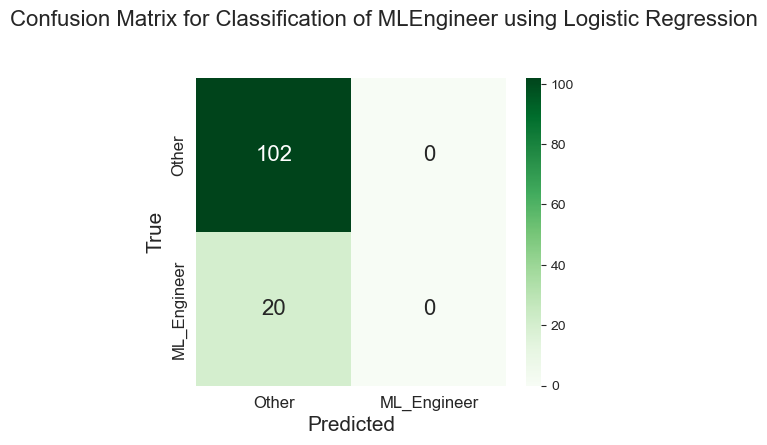

In [23]:
#use seaborn to create a heatmap of the confusion matrix from above
df_cm = pd.DataFrame(cm)

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 4))
fig.suptitle('Confusion Matrix for Classification of MLEngineer using Logistic Regression', 
             fontsize=16, y=1.05)
ax = plt.subplot()
sns.heatmap(df_cm, annot=True, cmap="Greens", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)
ax.xaxis.set_ticklabels(['Other','ML_Engineer'], fontsize=12) 
ax.yaxis.set_ticklabels(['Other','ML_Engineer'], fontsize=12, va='center')
plt.show()

In [24]:
# plot ROC curve
y_pred_prob = logistic.predict_proba(X_test)[:,1]
# calculate roc curve
ml_fpr, ml_tpr, ml_thresholds  = roc_curve(y_test, logistic.predict(X_test))
# roc auc score
ml_log_roc_auc = roc_auc_score(y_test, y_pred_prob)

In [25]:
#set a variable for the logistic intercept
log_intercept = logistic.intercept_ 
beta_0 = log_intercept

# extract log reg coefs
coef = logistic.coef_[0]
coef = np.array(coef)
df_coef = pd.DataFrame(coef)
df_coef = df_coef.T # transpose to match column names

# column names
names = X_train.columns
df_coef.columns = names
df_coef = df_coef.T # transpose for better view

# sort coefficients in ascending order
df_coef = df_coef.rename(columns = {0:'logregCV_coeff'})
df_coef = df_coef.sort_values('logregCV_coeff')
df_coef = df_coef.reset_index()
df_coef = df_coef.rename(columns = {'index':'Variable_Names', 'logreg_coeff':'logregCV_coeff'})
df_coef

,Variable_Names,logregCV_coeff
0,remote_ratio,-1.967842e-03
1,work_year,-9.057563e-04
2,Midsize_Company,-1.106123e-04
3,US_location,-1.021839e-04
4,US_resident,-9.207329e-05
5,Senior_Exp,-5.942866e-05
6,USD,-4.939642e-05
7,GBP,-3.183578e-05
8,full_time_employee,-2.819722e-05
9,Expert_Exp,-1.565774e-05


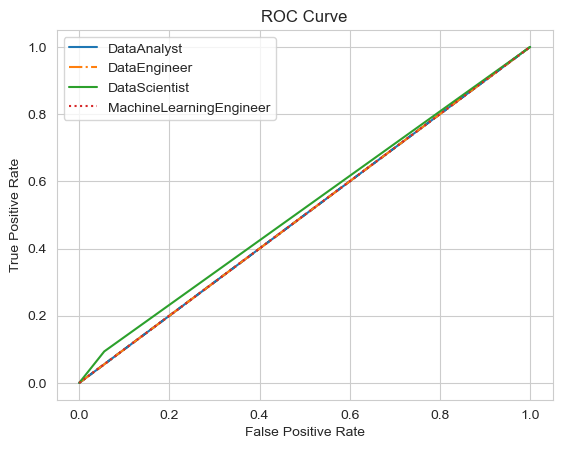

In [26]:
# plot ROC curve for all 4 models
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1],'k--')
ax.plot(da_fpr, da_tpr, label='DataAnalyst', linestyle='-')
ax.plot(de_fpr, de_tpr, label='DataEngineer', linestyle='-.')
ax.plot(ds_fpr, ds_tpr, label='DataScientist', linestyle='-')
ax.plot(ml_fpr, ml_tpr, label='MachineLearningEngineer', linestyle=':')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()


In [27]:
#create a dataframe comparing scores for each logistic regression
data = {'Data Analyst': [da_log_score_test, da_log_recall_test, da_log_precision_test,da_log_roc_auc],
        'Data Engineer': [de_log_score_test, de_log_recall_test, de_log_precision_test,de_log_roc_auc],
        'Data Scientist': [ds_log_score_test, ds_log_recall_test, ds_log_precision_test,ds_log_roc_auc],
        'Machine Learning Engineer': [ml_log_score_test, ml_log_recall_test, ml_log_precision_test,ml_log_roc_auc]}
df = pd.DataFrame(data, index=['Accuracy', 'Sensitivity', 'Specificity','ROC AUC'])
df

,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer
Accuracy,0.770492,0.655738,0.721311,0.836066
Sensitivity,0.000000,0.000000,0.093750,0.000000
Specificity,0.000000,0.000000,0.375000,0.000000
ROC AUC,0.645137,0.646429,0.578125,0.498039
